In [2]:
###importing the libraries into the environment
#uses New_environment220920 #now broken so use 3Dtrackplot

import mpl_toolkits
from mpl_toolkits import mplot3d
# %matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math as mt
import datetime
from datetime import datetime, timedelta, time

import statistics
import seaborn as sns
import os

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/opt/anaconda3/envs/3Dtrackplot/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
#ANALYZING DP AND SP 
#importing the cellprofiler output spreadhsheets of Hoxb5+Vwf+ and Hoxb5+Vwf- cells
# spreadsheets are in lots of different folders
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('DP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataDP=pd.concat(file_list, axis =0, ignore_index=True)
dataDP['Hoxb5_status']='DP'
print(dataDP)

file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('SP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataSP=pd.concat(file_list, axis =0, ignore_index=True)
dataSP['Hoxb5_status']='SP'

   ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0            5            1                 NaN                    NaN   
1            5            2                 NaN                    NaN   
2            1            1                 NaN                    NaN   
3            1            2                 NaN                    NaN   
4            1            3                 NaN                    NaN   
5            1            4                 NaN                    NaN   
6            1            5                 NaN                    NaN   
7            1            6                 NaN                    NaN   
8            1            7                 NaN                    NaN   
9            1            8                 NaN                    NaN   
10           1            9                 NaN                    NaN   
11           1           10                 NaN                    NaN   
12           1           11           

In [7]:
###merging the two dataframes
data=pd.concat([dataSP, dataDP], axis=0, ignore_index=True)
print(data)

    ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0             5            1                 NaN                    NaN   
1             5            2                 NaN                    NaN   
2             5            3                 NaN                    NaN   
3             5            4                 NaN                    NaN   
4             5            5                 NaN                    NaN   
..          ...          ...                 ...                    ...   
469           1           16                 NaN                    NaN   
470           2            1                 NaN                    NaN   
471           2            2                 NaN                    NaN   
472           2            3                 NaN                    NaN   
473           1            1                 NaN                    NaN   

    Metadata_Format Metadata_Frame Metadata_Series  \
0               NaN              0           

In [8]:
#importing the metadata and merging the metadata spreadsheet with the cellprofiler output spreadsheet
# metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')

# metadata['Metadata_VWF']=(metadata['Original_Filename']).str.replace('.czi','')
# # data['Metadata_VWF']=(data['Metadata_VWF']).str.replace('_0','')
# data=pd.merge(data, metadata[:], on = 'Metadata_VWF')
# print(data)

data['FileID']=data['Metadata_VWF'].str[0:19]
print(data['FileID'])
# data=pd.merge(data, metadata[:], on = 'FileID')


0      VWF_062_MS220421_M5
1      VWF_062_MS220421_M5
2      VWF_062_MS220421_M5
3      VWF_062_MS220421_M5
4      VWF_062_MS220421_M5
              ...         
469    VWF_043_MS211118_m1
470    VWF_043_MS211125_m3
471    VWF_043_MS211125_m3
472    VWF_043_MS211125_m3
473    VWF_082_MS230327_M1
Name: FileID, Length: 474, dtype: object


In [9]:
####exporting the merged dataframe as a csv file
#data.to_csv('/Users/secchim/Documents/230113TEST.csv')
# data.to_csv('/Users/secchim/Documents/230602TEST.csv') #includes up to VWF_062
data.to_csv('/Users/secchim/Documents/230719TEST.csv')#includes up to VWF_095

/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newva

<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransformMK'>

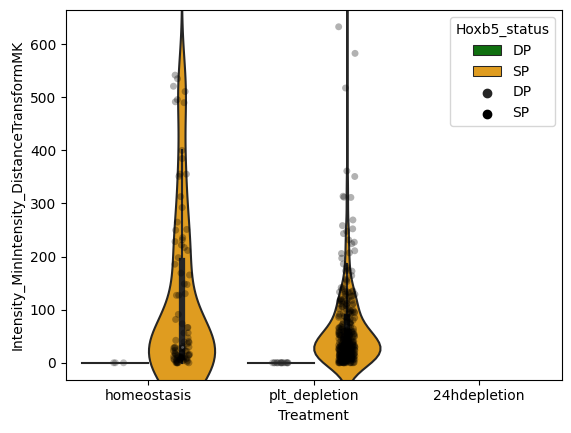

In [14]:
###plotting the distance to MK which is in the column 'Intensity_MinIntensity_DistanceTransformMK'

# sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data, dodge=True, color='black', alpha=0.3)

sns.violinplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('homeostasis','plt_depletion','24hdepletion','old_homeostasis'))
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data, dodge=True, color='black', alpha=0.3, hue_order=('DP','SP'), order=('homeostasis','plt_depletion','24hdepletion','old_homeostasis'))


/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data


<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransformMKprog'>

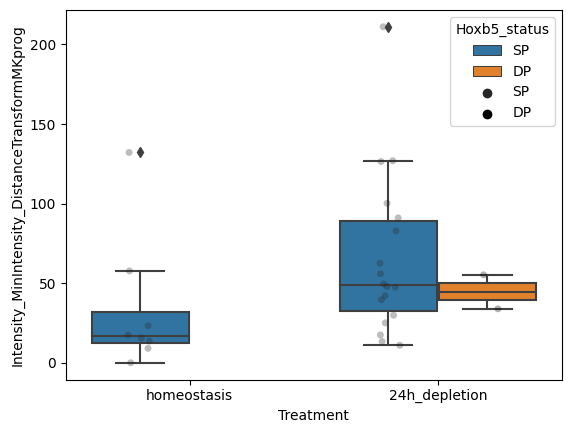

In [8]:
###plotting the distance to MKP which is in the column 'Intensity_MinIntensity_DistanceTransformMKprog'

sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMKprog", data=data, order=['homeostasis', '24h_depletion'])
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMKprog", data=data, dodge=True, color='black', alpha=0.3, order=['homeostasis', '24h_depletion'])


/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data


<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransformvessel'>

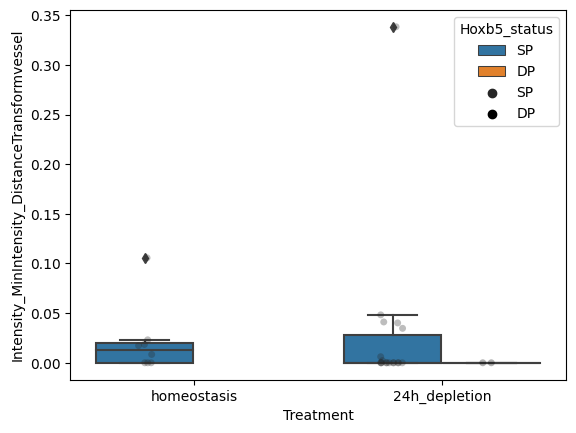

In [9]:
###plotting the distance to vessel which is in the column 'Intensity_MinIntensity_DistanceTransformvessel'

sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformvessel", data=data,  order=['homeostasis', '24h_depletion'])
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformvessel", data=data, dodge=True, color='black', alpha=0.3,  order=['homeostasis', '24h_depletion'])


In [82]:
#Analyze BM volume 
### importing the cellprofiler output of the bone marrow segmentation 

file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('Ilastik.csv'):
            # file_list.append(os.path.join(root,file))
            dataIlastik=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(dataIlastik)

dataIlastik=pd.concat(file_list, axis =0, ignore_index=True)
print(dataIlastik)

       ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0                5             1                 NaN                    NaN   
1                5             2                 NaN                    NaN   
2                5             3                 NaN                    NaN   
3                5             4                 NaN                    NaN   
4                5             5                 NaN                    NaN   
...            ...           ...                 ...                    ...   
72131            8           738                 NaN                    NaN   
72132            8           739                 NaN                    NaN   
72133            8           740                 NaN                    NaN   
72134            8           741                 NaN                    NaN   
72135            8           742                 NaN                    NaN   

      Metadata_Format  Metadata_Frame  Metadata_Ser

In [83]:
#Calculate total BM volume per tilescan by adding up the volume of all the BM objects in that tilescan and correcting for the voxel size
grouped=dataIlastik.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['BM_volume']=(newdf['AreaShape_Volume'].sum())/(0.829*0.829*3)
    dflist.append(newdf)
dataIlastik=pd.concat(dflist)
print(dataIlastik['BM_volume']) 

5570     8.370971e+07
5571     8.370971e+07
5572     8.370971e+07
5573     8.370971e+07
5574     8.370971e+07
             ...     
70647    1.333011e+04
70648    1.333011e+04
70649    1.333011e+04
70650    1.333011e+04
70651    1.333011e+04
Name: BM_volume, Length: 72136, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/3993930723.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/2388133583.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


2790      1.205062e+07
2791      1.205062e+07
2792      1.205062e+07
2793      1.205062e+07
2794      1.205062e+07
              ...     
184489    8.887348e+06
184490    8.887348e+06
184491    8.887348e+06
184492    8.887348e+06
184493    8.887348e+06
Name: vessel_volume, Length: 185170, dtype: float64


[Text(0, 0.5, 'vessel volume (µm3)')]

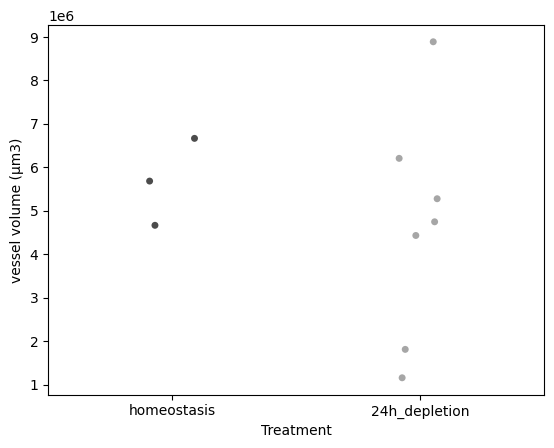

In [87]:
#Calculate vessel volume by adding up the volume of all the vessel objects in that tilescan and correcting for the voxel size
###first importing the cellprofiler output of the vessel segmentation, then merging them, then sum per tilescan of the volume of the vessels
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('AF647.csv'):
            # file_list.append(os.path.join(root,file))
            dataAF647=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(dataAF647)

dataAF647=pd.concat(file_list, axis =0, ignore_index=True)
# print(dataAF647)

grouped=dataAF647.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['vessel_volume']=(newdf['AreaShape_Volume'].sum())/(0.829*0.829*3)
    dflist.append(newdf)
dataAF647=pd.concat(dflist)
print(dataAF647['vessel_volume']) 

#importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
dataAF647['FileID']=dataAF647['Metadata_VWF'].str[0:19]
# print(dataAF647['FileID'])

dataAF647=pd.merge(dataAF647, metadata[:], on = 'FileID')
dataAF647=dataAF647[dataAF647['Treatment']!='old_homeostasis']
dataAF647=dataAF647[dataAF647['Treatment']!='plt_depletion']
dataAF647=dataAF647[['Metadata_VWF','vessel_volume','Treatment']].drop_duplicates()

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="vessel_volume", data=dataAF647, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g.set(ylabel='vessel volume (µm3)')

In [89]:
###This cell calculates the BM cellularity by dividing the BM volume minus the  vessel volume by the volume of a cell of 11um diameter

#Merge dataIlastik and dataAF647
dataI=dataIlastik[['BM_volume','Metadata_VWF']]
dataI=dataI.drop_duplicates()
dataV=dataAF647[['vessel_volume','Metadata_VWF','Treatment']]
dataV=dataV.drop_duplicates()
dataBM=pd.merge(dataI, dataV[:], on = 'Metadata_VWF')
# print(dataBM)

#Subtract vessel volume to BM volume
for i in dataBM.index:
    dataBM.loc[i,'BM_vessel']=dataBM.loc[i,'BM_volume']-dataBM.loc[i,'vessel_volume']
#calculate cell number (cell volume of a diameter of 10um = 523.6, 11um =726)
    dataBM.loc[i,'Cellularity']=dataBM.loc[i,'BM_vessel']/736.9

print(dataBM)

#Haematopoietic stem cells in perisinusoidal niches are protected from ageing 
#https://www.nature.com/articles/s41556-019-0418-y#Fig1
#this paper estimates 1357 cells in 1 000 000 = 736.9 for 1 cells

###Plot normalized vessel volume

grouped=dataBM.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['norm_vol']=(newdf['vessel_volume']/newdf['BM_volume'])
    dflist.append(newdf)
dataAF647=pd.concat(dflist)
print(dataAF647['norm_vol']) 

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="norm_vol", data=dataAF647, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g.set(ylabel='normalized vessel volume (µm3)')
### some tilescans have greater vessel volume than BM volume which is incorrect
print(dataAF647)

      BM_volume                                       Metadata_VWF  \
0  4.391972e+07  VWF_053_MS220208_M3_homeostasis_tilescanpadded...   
1  4.070559e+07        VWF_060_MS220408_M2_tilescanpadded-stitched   
2  1.023717e+07       VWF_062_MS220421_M5_TILESCANpadding-stitched   
3  2.526188e+04        VWF_091_MS230402_M1_Tilescan-Stitching-01_0   
4  3.470544e+04        VWF_091_MS230402_M2_Tilescan-Stitching-02_0   
5  9.450833e+03  VWF_093_MS230406_M2_tilescan_24hdep-Stitching-...   
6  1.477260e+04  VWF_093_MS230406_M3_tilescan_24hdep-Stitching-...   
7  2.116676e+04        VWF_095_MS230420_M5_tilescan-Stitching-02_0   
8  2.591958e+04        VWF_095_MS230420_M6_tilescan-Stitching-03_0   
9  1.333011e+04        VWF_095_MS230420_M7_tilescan-Stitching-01_0   

   vessel_volume      Treatment     BM_vessel   Cellularity    norm_vol  
0   6.664774e+06    homeostasis  3.725494e+07  50556.306289    0.151749  
1   5.275700e+06  24h_depletion  3.542989e+07  48079.639125    0.129606  
2   1.8

0    0.000158
1    0.000187
2    0.000612
3    0.000052
4    0.000050
Name: SP_freq, dtype: float64 0    0.000000
1    0.000000
2    0.000175
3    0.000000
4    0.000000
Name: DP_freq, dtype: float64 0    0.000158
1    0.000187
2    0.000787
3    0.000052
4    0.000050
Name: Kuo_freq, dtype: float64 0    VWF_053_MS220208_M3_homeostasis_tilescanpadded...
1          VWF_060_MS220408_M2_tilescanpadded-stitched
2         VWF_062_MS220421_M5_TILESCANpadding-stitched
3          VWF_063_MS220428_m1_tilescanpadded-stitched
4          VWF_063_MS220428_m2_tilescanpadded-stitched
Name: Metadata_VWF, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_68249/3366608021.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


<AxesSubplot: ylabel='Cellularity'>

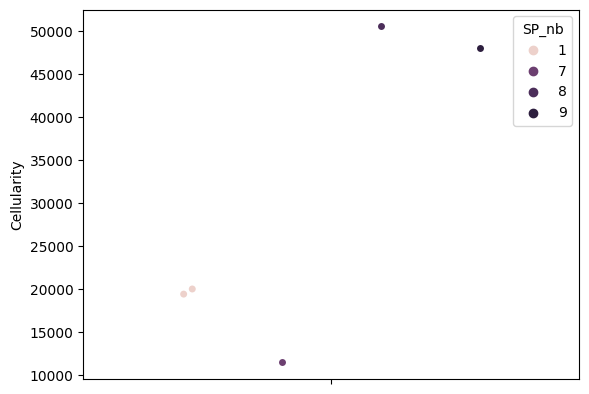

In [24]:
#Calculate the frequency of KuO per tilescan
####sum of all KuO cells per tilescan divided by BM cellularity

# print(data['Hoxb5_status'])
grouped=data.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['SP_nb']=newdf[newdf['Hoxb5_status']=='SP'].shape[0]
    newdf['DP_nb']=newdf[newdf['Hoxb5_status']=='DP'].shape[0]
    dflist.append(newdf)
data=pd.concat(dflist)
# print(data['SP_nb'], data['DP_nb']) 

dataF=data[['Metadata_VWF', 'SP_nb','DP_nb']]
dataF=dataF.drop_duplicates()
dataF=pd.merge(dataF, dataBM[:], on = 'Metadata_VWF')

for i in dataF.index:
    dataF.loc[i, 'SP_freq']=dataF.loc[i,'SP_nb']/dataF.loc[i,'Cellularity']
    dataF.loc[i,'DP_freq']=dataF.loc[i, 'DP_nb']/dataF.loc[i,'Cellularity']
    dataF.loc[i,'Kuo_freq']=(dataF.loc[i,'SP_nb']+dataF.loc[i,'DP_nb'])/dataF.loc[i,'Cellularity']
print(dataF['SP_freq'], dataF['DP_freq'], dataF['Kuo_freq'], dataF['Metadata_VWF'])

#PB VWF_063_m2_tilescanpadded2 has no SP
#Kuo freqfreq between 0.00005 and 0.0007 => between 0.005% and 0.07% Sacma is between 0.01 and 0.07%
#by FACS SP freq is between 0.04%and 0.01%
#by FACS DP freq is about 0.00001 => 0.00001 x Cellularity would be expected number of DP => under 1 in some tilescans

sns.stripplot( y="Cellularity", hue = 'SP_nb', data=dataF, dodge=True)

In [16]:
#### exporting dataF as a csv file
dataF.to_csv('/Users/secchim/Documents/221130TEST.csv')

In [6]:
# MKs from CP tilescan 
###importing all the cellprofiler output spreadsheets of MKs and merging it with the metadata spreadsheet
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('MK.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

data=pd.concat(file_list, axis =0, ignore_index=True)

print(data)

#importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
data['FileID']=data['Metadata_VWF'].str[0:19]
print(data['FileID'])

data=pd.merge(data, metadata[:], on = 'FileID')

print(len(data['Metadata_VWF'].unique()))
print(len(data['FileID'].unique()))

       ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0                5             1                 NaN                    NaN   
1                5             2                 NaN                    NaN   
2                5             3                 NaN                    NaN   
3                5             4                 NaN                    NaN   
4                5             5                 NaN                    NaN   
...            ...           ...                 ...                    ...   
13698            8           233                 NaN                    NaN   
13699            8           234                 NaN                    NaN   
13700            8           235                 NaN                    NaN   
13701            8           236                 NaN                    NaN   
13702            8           237                 NaN                    NaN   

      Metadata_Format  Metadata_Frame  Metadata_Ser

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3448/952296158.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


6106      6740
4294      1812
0         4294
12846    16354
29200     6369
35569     5825
41394    19224
41421    19224
60618      312
60930     4484
65414    12246
77660     2317
79977     3570
83547    31824
Name: MK_count, dtype: int64
10


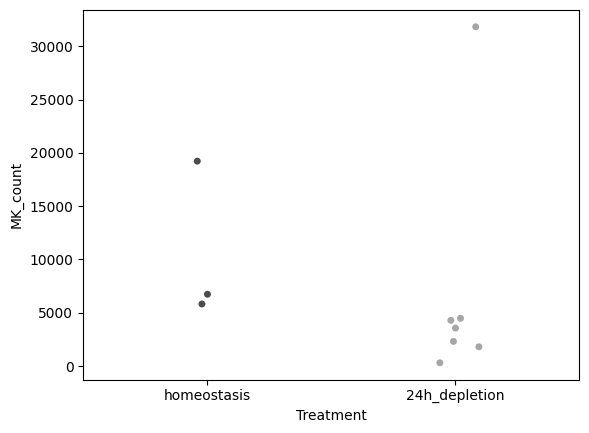

In [7]:
###calculating and plotting MK counts per tilescan

grouped=data.groupby(['FileID']) #was by file ID
dflist=[]
for i, newdf in grouped:
    newdf['MK_count']=newdf.shape[0] #each row is one MK so the number of rows is the number of MKs
    dflist.append(newdf)
datab=pd.concat(dflist)
datab=datab[['FileID','MK_count','Treatment']].drop_duplicates()
print(datab['MK_count'])
datab=datab[datab['Treatment']!='old_homeostasis']
datab=datab[datab['Treatment']!='plt_depletion']
print(len(datab['FileID'].unique()))

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="MK_count", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
# g[1].set(ylabel='MK count')

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/3492815861.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


6106      12316.0
6126      12932.0
6146      41592.0
6166       6972.0
6186      26936.0
           ...   
115275     5576.0
115287     2598.0
115299     3304.0
115335     2744.0
115347     8160.0
Name: vol_um, Length: 6935, dtype: float64


[Text(0, 0.5, 'MK volume um3')]

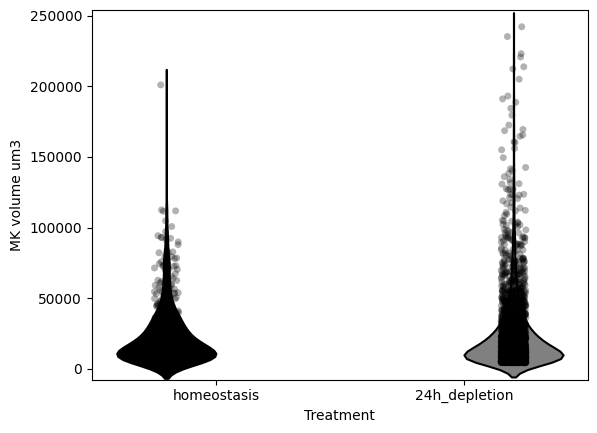

In [72]:
###calculating and plotting MK volume, the MK volume is in the column 'AreaShape_Volume'

grouped=data.groupby(['FileID'])
dflist=[]
for i, newdf in grouped:
    # newdf['mean_vol']=newdf['AreaShape_Volume'].mean()
    for b,row in newdf.iterrows():
        # newdf.loc[b,'vol_um']=newdf.loc[b,'AreaShape_Volume']*newdf.loc[b,'Scale_X']*newdf.loc[b,'Scale_Y']*newdf.loc[b,'Scale_Z']*1000000 ###normalized to voxel size
        newdf.loc[b,'vol_um']=newdf.loc[b,'AreaShape_Volume']#*1000000
    dflist.append(newdf)
datab=pd.concat(dflist)
datab=datab[['FileID','vol_um','Treatment']].drop_duplicates()
print(datab['vol_um'])
# datab=data[['FileID','AreaShape_Volume','Treatment']]
##filtering MK based on volume
datab=datab[datab['vol_um']<250000]
datab=datab[datab['vol_um']>4188]
datab=datab[datab['Treatment']!='old_homeostasis']
datab=datab[datab['Treatment']!='plt_depletion']

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="vol_um", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
g=(sns.violinplot(x=("Treatment"), hue='Treatment', y="vol_um", data=datab, showfliers = False, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'), legend=False), sns.stripplot(x=("Treatment"), hue='Treatment', y="vol_um", data=datab, alpha=0.3, dodge=True, palette=['black','black'], hue_order=('homeostasis','24h_depletion')))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g[1].set(ylabel='MK volume um3')

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="AreaShape_Volume", dodge=True, data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='MK volume')

In [44]:
###### CHECKING MISSING MOVIES because the second CP pipeline failed
# import os

correct_file=[]
missing_file=[]

filepath='/Users/secchim/Downloads/movie_output'

for root, dirs, files in os.walk(filepath): # will open up all the folders, dirs is all the name of the folder it finds, files will contain all the filenames it finds
    for file in files:        
        if file.endswith("Experiment.csv"):
            nfile=os.path.join(root,file)
            nfile=nfile[38:-22]
            if nfile not in correct_file:
                # print(nfile)
                correct_file.append(nfile)

for root, dirs, files in os.walk(filepath): # will open up all the folders, dirs is all the name of the folder it finds, files will contain all the filenames it finds
    for file in files:
            if file.endswith(".tiff"):
                xfile=os.path.join(root,file)
                xfile=xfile[38:-(len(file)+1)]
                if xfile not in missing_file and xfile not in correct_file:
                    # print(xfile)
                    missing_file.append(xfile)


# print('correct_file', correct_file)
print('file_missing from downstream folders', missing_file)


file_missing from downstream folders ['VWF_048_MS220120_M2_movie20_depletion_P14', 'VWF_048_MS220120_M2_movie19_depletion_P14', 'VWF_049_MS220201_M1_Snap_movie10depletion_P12DP', 'VWF_049_MS220201_M1_Snap_movie6depletion_P152kuo', 'VWF_066_MS220519_M2_movie1k_P9DP', 'VWF_045_MS211208_M2_movie7_P25', 'VWF_063_MS220428_m1_movie3_P9dimdp', 'VWF_045_MS211208_M2_movie8_P27', 'VWF_066_MS220519_M2_movie1k_P12_2k_mk', 'VWF_045_MS211208_M2_movie8_P26', 'VWF_049_MS220201_M1_Snap_movie7depletion_P9kuo2', 'VWF_043_MS211126_m4-pltdepletionmovie2_P12+', 'VWF_066_MS220519_M2_movie1k_P14k', 'VWF_048_MS220120_M2_movie19_depletion_P11', 'VWF_048_MS220120_M2_movie20_depletion_P11', 'VWF_060_MS220408_M1_MOVIE2_P10', 'VWF_060_MS220408_M1_MOVIE2_P8', 'VWF_060_MS220408_M1_MOVIE1_P4GREENVESSEL', 'VWF_060_MS220408_M1_MOVIE5_P17', 'VWF_045_MS211208_M2_movie7_P27', 'VWF_060_MS220408_M2_movie_test2_P9', 'VWF_048_MS220120_M2_movie16_depletion_P7', 'VWF_048_MS220120_M2_movie16_depletion_P9', 'VWF_060_MS220408_M1_MO

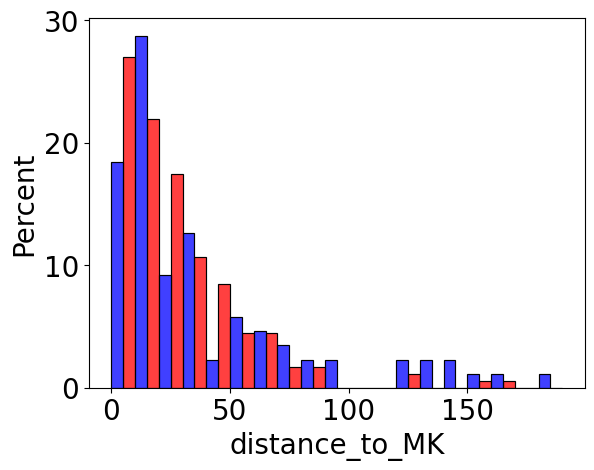

In [59]:
### distance to MK and vessel from Imaris
###all the individual distance measurements of movies and tilescans were copied into this distance_to_MK_v1.csv spreadsheet
plt.rcParams["font.size"]=20

data=pd.read_csv('/Users/secchim/Documents/Experiments/distance analysis/distance_to_MK_v1.csv', index_col=None, header=0)

###filtering the dataset depending on what I want to plot
# data=data[data['Treatment']=='homeostasis']
# data=data[data['Treatment']=='24h_depletion']
data=data[data['file_type']=='tilescan']

data=data[data['Treatment']!='24h_depletion']
data=data[data['Treatment']!='depletion']
# data=data[data['Treatment']!='homeostasis']
data=data[data['Hoxb5_status_corrected']=='hoxb5']
# data=data[data['Hoxb5_status_corrected']=='Hoxb5_vwf']
data=data[data['Time']==1]

#substracting 4 because distance is measured from center of dot with 1um radius to edge of vessel
for r,b, in data.iterrows():
    data.loc[r,'distance_to_MK']=data.loc[r,'distance_to_MK']-4 
    if data.loc[r,'distance_to_MK']<0: ###Imaris distances are negative if they overlap
        data.loc[r,'distance_to_MK']=0

####plotting the distribution of distances to MK as a histogram, 2 groups side by side

##HOXBV5VWF VS HOXB5
#tried stat ='percent' below but because 2 groups it normalized to higher group # needed to add common_norm=False
# sns.histplot(data, x="distance_to_MK", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=10, multiple="dodge", stat='percent', common_norm=False)

###HOXB5 AGED VS YOUNG
sns.histplot(data, x="distance_to_MK", hue="Treatment", palette=['blue','red'], hue_order=('homeostasis','ageing'), legend=False, binwidth=10, multiple="dodge", stat='percent', common_norm=False)

#substracting 4 because distance is measured from center of dot with 1um radius to edge of vessel
for r,b, in data.iterrows():
    data.loc[r,'distance_to_vessel']=data.loc[r,'distance_to_vessel']-4 
    if data.loc[r,'distance_to_vessel']<0:###Imaris distances are negative if they overlap
        data.loc[r,'distance_to_vessel']=0

# sns.histplot(data, x="distance_to_vessel", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=5, multiple="dodge")
# data=data[[ 'Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'distance_to_MK']]
# data.to_csv('/Users/secchim/Documents/Experiments/distance analysis/aged_hoxb5_MK.csv')


data['Final_Cell_ID']=data['file']+'_'+data['ID'].astype(str)
data['Batch_ID']=data['file'].str[0:19]
data['Group']=data['Treatment']+'_'+data['Hoxb5_status_corrected']
print(len(data['Final_Cell_ID'].unique()),len(data['Batch_ID'].unique()))



# # sns.histplot(data, x="distance_to_vessel", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=5, multiple="dodge")
# # sns.histplot(data, x="distance_to_vessel", hue="Treatment", palette=['green','black'], hue_order=('homeostasis','24h_depletion'), legend=False, binwidth=5, multiple="dodge")
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="distance_to_vessel", data=data, dodge=True, color='black', alpha=0.3,  order=('homeostasis','24h_depletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="distance_to_vessel", data=data, showfliers = False, palette=['green','orange'],  order=('homeostasis','24h_depletion')))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='distance to vessel (µm)')
# g[1].set(ylim=(0,20))
# plt.show(g)

g= sns.histplot(data, x="distance_to_MK", hue="Treatment", palette=['black','red'], hue_order=('homeostasis','24h_depletion'), legend=False, binwidth=5, multiple="dodge",stat='percent', common_norm=False)
plt.show(g)
# data.to_clipboard()

##getting numbers for the percentages
# dx=data[data['Treatment']=='homeostasis']
# # print('homeostasis', len(dx[dx['distance_to_MK']<20]), len(dx[dx['distance_to_MK']>20]))
# print('homeostasis', len(dx[dx['distance_to_vessel']<10]), len(dx[dx['distance_to_vessel']>10]))
# dx=data[data['Treatment']=='24h_depletion']
# # print('24h_depletion', len(dx[dx['distance_to_MK']<20]), len(dx[dx['distance_to_MK']>20]))
# print('24h_depletion', len(dx[dx['distance_to_vessel']<10]), len(dx[dx['distance_to_vessel']>10]))
# dx=data[data['Treatment']=='ageing']
# # data=data[data['Hoxb5_status_corrected']=='Hoxb5_vwf']
# print('ageing', len(dx[dx['distance_to_MK']<20]), len(dx[dx['distance_to_MK']>20]))


###getting numbers of mice used in each conditions
list=data['Group'].unique()
for i in list:
    dx=data[data['Group']==i]
    # print(i, len(dx['Batch_ID'].unique()),dx['Batch_ID'].unique())
    # print(i, len(dx['Final_Cell_ID'].unique()),dx['Final_Cell_ID'].unique())

list=[]
for i, newdf in data.groupby(['Batch_ID']):
    newdf['sum_KuO']=newdf[newdf['Hoxb5_status_corrected']=='hoxb5'].shape[0]
    newdf['sum_Vwf']=newdf[newdf['Hoxb5_status_corrected']=='Hoxb5_vwf'].shape[0]
    list.append(newdf[['Batch_ID','sum_KuO','sum_Vwf','Treatment']].drop_duplicates())
dx=pd.concat(list)
dx.to_clipboard()

# sns.histplot(data, x="distance_to_vessel", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=5, multiple="dodge")
# sns.histplot(data, x="distance_to_vessel", hue="Treatment", palette=['green','black'], hue_order=('homeostasis','24h_depletion'), legend=False, binwidth=5, multiple="dodge")
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="distance_to_MK", data=data, dodge=True, color='black', alpha=0.3,  order=('homeostasis','24h_depletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="distance_to_MK", data=data, showfliers = False, palette=['green','orange'],  order=('homeostasis','24h_depletion')))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='distance to MK (µm)')
# g[1].set(ylim=(0,180))
# plt.show(g)

# g=sns.stripplot(x=("Treatment"), y="distance_to_MK", color=('orange'), data=data, dodge=True, alpha=0.7, order=('homeostasis','24h_depletion'))
# plt.legend([], [], frameon=False)
# g.set(ylabel='µm')
# g.set(ylim=(0,180))
# plt.show(g)

# g=sns.stripplot(x=("Treatment"), y="distance_to_vessel",color='orange', data=data, dodge=True, alpha=0.7, order=('homeostasis','24h_depletion'))
# plt.legend([], [], frameon=False)
# g.set(ylabel='µm')
# g.set(ylim=(0,110))
# plt.show(g)
# # model = ols('distance_to_MK ~  C(Hoxb5_status_corrected) + C(Treatment)', data=data).fit()
# # sm.stats.anova_lm(model, typ=2)
# # # sm.stats.multicomp.pairwise_tukeyhsd(data['distance_to_MK'], data['Group'], alpha=0.05).summary()

# # # sns.histplot(data, x="distance_to_MK", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=10, multiple="dodge")
# # # data.to_csv('/Users/secchim/Documents/Experiments/distance analysis/plot.csv', index=False)



# # model = ols('distance_to_vessel ~  C(Hoxb5_status_corrected) + C(Treatment)', data=data).fit()
# # sm.stats.anova_lm(model, typ=2)
# # # sm.stats.multicomp.pairwise_tukeyhsd(data['distance_to_vessel'], data['Group'], alpha=0.05).summary()


16


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/1506652176.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/1506652176.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


{'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_0': 52.59916730329479, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_1': 52.59916730329479, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_2': 182.26756889257638, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_3': 109.16866777679398, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_4': 109.16866777679398, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_5': 131.90546323882882, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_6': 142.70261794501178, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_7': 116.70190692636514, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_8': 150.71580047231285, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_9': 146.9558814645433, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_10': 146.95588

<AxesSubplot: xlabel='min_distance_to_kuo', ylabel='Percent'>

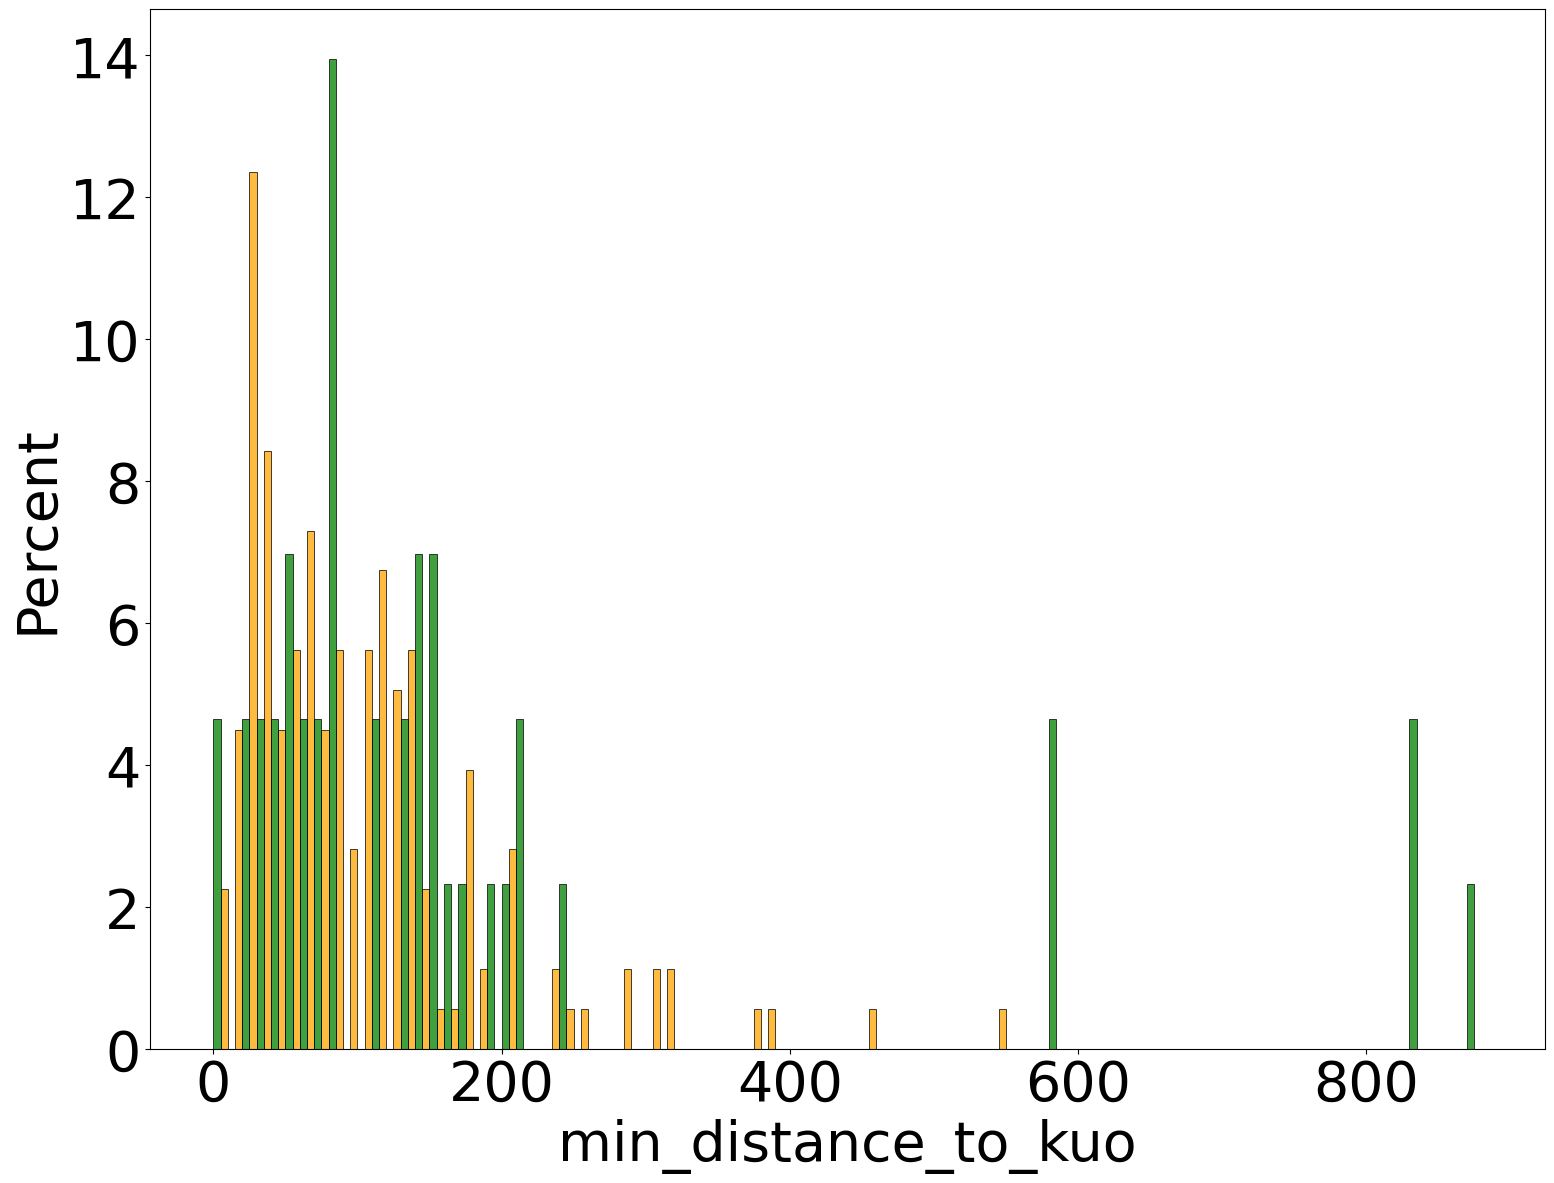

In [160]:
#Calculating distances between KuO, edge to edge, based on cell positions in Imaris
data=pd.read_csv('/Users/secchim/Documents/Experiments/distance analysis/distance_to_MK_v1.csv', index_col=None, header=0)
plt.rcParams["font.size"]=40

# data=data[data['Treatment']=='homeostasis']
# data=data[data['Treatment']=='ageing']
data=data[data['file_type']=='tilescan']
data['Final_Cell_ID']=data['file']+'_'+data['ID'].astype(str)
# datax=data[data['track_length']!=0]
# data=data[data['Treatment']!='ageing']
data=data[data['Treatment']!='depletion']
data=data[data['Treatment']!='24h_depletion']
# data=data[data['Treatment']!='homeostasis']
# datax=datax[datax['Metadata_Timepoint']!='1']

data['Batch_ID']=data['file'].str[0:19]
print(len(data['Batch_ID'].unique()))
datab=data[['Final_Cell_ID', 'file','Treatment', 'Hoxb5_status_corrected', 'x', 'y','z']]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']

dict={}
dict=dict.fromkeys(datab['Final_Cell_ID'].unique())
# print(dict, type(dict))


# datab['min_distance_to_kuo']=10000000
grouped=datab.groupby(['file'])
for i, newdf in grouped:
    if len(newdf['Final_Cell_ID'].unique())>1: ###if more than one kuO
        for a in newdf['Final_Cell_ID'].unique():
            for b in newdf['Final_Cell_ID'].unique():
                if a!=b:
                    a_coordinates=newdf[newdf['Final_Cell_ID']==a]
                    b_coordinates=newdf[newdf['Final_Cell_ID']==b]
                    min_distance_to_kuo=mt.sqrt((a_coordinates.iloc[0,4]-b_coordinates.iloc[0,4])**2+(a_coordinates.iloc[0,5]-b_coordinates.iloc[0,5])**2+(a_coordinates.iloc[0,6]-b_coordinates.iloc[0,6])**2)
                    # print(dict[a])
                    if dict[a]==None: 
                        dict[a]=min_distance_to_kuo
                    elif dict[a]>min_distance_to_kuo:
                        dict[a]=min_distance_to_kuo
                    
                    # if newdf.iloc[1,'min_distance_to_kuo']>min_distance_to_kuo:
                        # newdf['min_distance_to_kuo']=min_distance_to_kuo
                    # dflist.append(newdf)
# datab=pd.concat(dflist)    
# print(datab['min_distance to kuo'])
print(dict)
addup=pd.DataFrame.from_dict(dict, orient='index', columns=['min_distance_to_kuo'])
addup['Final_Cell_ID']=addup.index
# for i,r in datab.iterrows():
#     if datab.iloc[i,'Final_Cell_ID'] in dict.keys():
#         datab.iloc[i,'min_distance_to_kuo']=dict[(datab.iloc[i,'Final_Cell_ID'])].values()
# print(datab['min_distance_to_kuo'])

# print(addup[:])


data=pd.merge(datab, addup[:], on = 'Final_Cell_ID')
print(data['min_distance_to_kuo'])
data=data[[ 'Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'min_distance_to_kuo','Group']]
data=data.drop_duplicates()
# data.to_csv('/Users/secchim/Downloads/min_kuo_distances.csv', index=False)


##this one works fine, plotting all conditions and cell groups at once
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'),  palette=['green','orange'], order=('homeostasis','depletion','24hdepletion'), legend=False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'),  palette=['green','orange'], order=('homeostasis','ageing'), legend=False)

# data=data[data['Hoxb5_status_corrected']!='Hoxb5_vwf'] ### added this line because in young mice, there are no Hoxb5+Vwf+ cell in tilescans in homeostasis
#need to remove 10 (considering a radius of 5 for each cell) to calculate distance between cell edges
for i, b in data.iterrows():
    data.loc[i,'min_distance_to_kuo']=data.loc[i,'min_distance_to_kuo']-10 ###because before center to center, assuming radius is 5um, this makes it edge to edge distance
    if data.loc[i,'min_distance_to_kuo']<0:
        data.loc[i,'min_distance_to_kuo']=0

###plotting the distribution of distances to MK as a histogram, 2 groups side by side

##plotting homeostasis and depletion for Hoxb5+vwf-
# data=data[data['Hoxb5_status_corrected']=='hoxb5']
# sns.histplot(data, x="min_distance_to_kuo", hue="Treatment", palette=['black','red'], hue_order=('homeostasis','24h_depletion'), legend=False, binwidth=10, multiple="dodge",stat='percent', common_norm=False)
##plotting homeostasis and ageing for Hoxb5+vwf-
# sns.histplot(data, x="min_distance_to_kuo", hue="Treatment", palette=['blue','red'], hue_order=('homeostasis','ageing'), legend=False, binwidth=10, multiple="dodge",stat='percent', common_norm=False)


# ## plotting hoxb5vwf+ vs hoxb5vwf- in ageing
data=data[data['Treatment']!='homeostasis']
sns.histplot(data, x="min_distance_to_kuo", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=10, multiple="dodge",stat='percent', common_norm=False)
# print(len(data['Final_Cell_ID'].unique()))

# #TO GET THE NUMBERS OF CELLS IN CLUSTER FOR THE PIE PLOTS
# for i in data['Group'].unique():
#     db=(data[data['Group']==i])
#     print(i, len(db[db['min_distance_to_kuo']<20]))
#     print(i, len(db[db['min_distance_to_kuo']>20]))

##STATS
# data=data[data['Treatment']!='depletion']###When excluding na, compare only homeostasis and 24hdepletion
# model = ols('min_distance_to_kuo ~  C(Hoxb5_status_corrected) + C(Treatment)', data=data).fit()
# sm.stats.anova_lm(model, typ=2)
# sm.stats.multicomp.pairwise_tukeyhsd(data['min_distance_to_kuo'], data['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(data['min_distance_to_kuo'], data['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(data['min_distance_to_kuo'], data['Group'], alpha=0.05).summary()

# data.to_csv('/Users/secchim/Documents/Experiments/distance analysis/permut_hoxb5.csv', index=False)
# data.to_csv('/Users/secchim/Documents/Experiments/distance analysis/permut_hoxb5_aged.csv', index=False)

# ### calculating how many cells and how many mice used in this analysis
# data['Mouse']=data['file'].str[0:19]
# # list=[ 'Hoxb5_vwf_homeostasis','hoxb5_homeostasis', 'Hoxb5_vwf_depletion', 'hoxb5_depletion', 'Hoxb5_vwf_24hdepletion', 'hoxb5_24hdepletion']
# list=[ 'homeostasis', 'depletion', '24h_depletion']
# for i in list: 
#     # dx=data[data['Group']== i]
#     dx=data[data['Treatment']== i]
#     print(i, len(dx['Mouse'].unique()),dx['Mouse'].unique())
#     # print(i, len(dx['Final_Cell_ID'].unique()))

In [95]:
###IMARIS MK MEASUREMENTS
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 13.5
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["font.size"]=40

###MK surface measurements from Imaris were copied to this MK_measurements.csv spreadsheet
data=pd.read_csv('/Users/secchim/Documents/Experiments/distance analysis/MK_measurements.csv', index_col=None, header=0)
# data=data[data['Treatment']=='homeostasis']

# for r,b, in data.iterrows():
#     if data.loc[r,'Volume']>100000:
#         data.loc[r,'Volume']=None

# # sns.histplot(data, x="Volume", hue="Treatment", palette=['blue','red'], hue_order=('homeostasis','ageing'), legend=False, binwidth=1000, multiple="dodge")

# sns.histplot(data, x="Sphericity", hue="Treatment", palette=['blue','red'], hue_order=('homeostasis','ageing'), legend=False, binwidth=0.1, multiple="dodge")

# # g=(sns.stripplot(x=("Treatment"),hue='File_ID', y="Volume", data=data, alpha=0.3), sns.violinplot(x=("Treatment"), hue='File_ID', y="Volume", data=data, showfliers = False, palette=['green','orange']))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# # plt.legend([], [], frameon=False)
# # g[1].set(ylabel='MK volume (µm3)')
# # g[1].set(ylim=(0,150000))
# # plt.show(g)

# datab=data[['File_ID','Volume','Treatment']]### comment out when plotting ageing
datab=data[['File_ID','Volume','Treatment','Volume Outside']]###
# datab['Treatment']=datab['Treatment'].str.replace('homeostasis','young')###comment out when plotting depletion
datab=datab[datab['Treatment']!='ageing'] ###comment out when plotting depletion
# datab=datab[datab['Treatment']!='24h_depletion']### comment out when plotting ageing
###filtering MK based on volume
datab=datab[datab['Volume']>4188]
datab=datab[datab['Volume']<150000]

# ###MK count
grouped=datab.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['MK_count']=newdf.shape[0]
    newdf['total_vol']=newdf['Volume Outside'].max()
    newdf['MK_norm']=newdf['MK_count']/newdf['total_vol']*(249*249*30)
    dflist.append(newdf)
datab=pd.concat(dflist)
# datab=datab[['File_ID','MK_count','Treatment']].drop_duplicates()
datab=datab[['File_ID','MK_norm','Treatment']].drop_duplicates()
print(datab)
# # datab=datab[datab['Treatment']!='ageing']

# # g=sns.stripplot(x=("Treatment"), hue='Treatment', y="MK_norm", data=datab, alpha=0.7, s=10, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="MK_norm", data=datab, alpha=0.7, s=10, palette=['black','grey'], hue_order=('young','ageing'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='MK count')

###MK volume

# # # g=sns.stripplot(x=("Treatment"), hue='Treatment', y="Volume", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # # # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# # # plt.legend([], [], frameon=False)
# # # g.set(ylabel='MK volume (µm3)')

# # ##MK mean volume

# grouped=datab.groupby(['File_ID'])
# dflist=[]
# for i, newdf in grouped:
#     newdf['mean_vol']=newdf['Volume'].mean()
#     dflist.append(newdf)
# datab=pd.concat(dflist)
# datab=datab[['File_ID','mean_vol','Treatment']].drop_duplicates()
# print(datab)
# # datab=datab[datab['Treatment']!='ageing']

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="mean_vol", data=datab, alpha=0.7, s=10, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # g=sns.stripplot(x=("Treatment"), hue='Treatment', y="mean_vol", data=datab, alpha=0.7, s=10, palette=['black','grey'], hue_order=('young','ageing'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='µm3')
# g.set(ylim=(0, 70000))


                                                File_ID    MK_norm  \
744   VWF_043_MS211125_m3-tilescanpaddedstiched_Stat...  24.654558   
2455  VWF_053_MS220208_M3_homeostasis_tilescanpadded...  26.970221   
2805  VWF_060_MS220408_M2_tilescanpadded-stitchedMK_...   8.519283   
1682  VWF_062_MS220421_M5_TILESCAN_2padded-stitchedM...  21.813945   
1612  VWF_063_MS220428_m1_tilescanpadded-stitchedMK_...  12.997445   
2047  VWF_078_MS230119_M1_tilescan_Day0-Stitching-01...  19.020112   
1327  VWF_078_MS230122_M5_tilescan_Day0-Stitching-02...   0.346572   
1472  VWF_078_MS230122_M6_tilescan_Day0-Stitching-03...   0.510639   
0     VWF_091_MS230402_M1_Tilescan-Stitching-01_Stat...  23.239841   
163   VWF_102_MS230520_M1_homeostasis_tilescan-Stitc...  25.622912   
974   VWF_102_MS230520_M3_24hdep_tilescan-Stitching-...  38.067155   
2153  VWF_102_MS230520_M4_24hdep_tilescan-Stitching-...  33.368934   
2274  VWF_107_MS230615_M1__tilescan-Stitching-03MK_S...  32.572065   
1225  VWF_109_MS2306

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/1211310182.py:37: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [153]:
####automating the merging of the MK spreadsheets, because Imaris exports one spreadsheet per tilescan, and I want to merge them all into one spreadsheet without the manual copy paste

file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/tilescans_MK'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('Volume.csv'):
            data=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0) ###if you open an Imaris spreadsheet you will see that the format is weird and the first 3 rows are blank
            ###so they need to be skipped which is why I added skiprows=3
            if file.endswith('MK_Volume.csv'):
                data['File_ID']=file.replace('MK_Volume.csv','_')
            elif file.endswith('v2_Volume_Outside_Img=1.csv'):
                data['File_ID']=file.replace('v2_Volume_Outside_Img=1.csv','_')
            else:
                data['File_ID']=file.replace('_Volume.csv','_')
            file_list.append(data)
            # print(file)

data=pd.concat(file_list, axis =0, ignore_index=True)
# print(data)
# print(data['File_ID'])

###merging with metadata
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
metadata['File_ID']=(metadata['Original_Filename']).str.replace('.czi','_')
# print(metadata['File_ID'])
metadata=metadata[['File_ID','Treatment']].drop_duplicates()

datab=pd.merge(data, metadata[:], on = 'File_ID')
# print(datab)

###filttering MK based on volume
datab=datab[datab['Volume']>4188]
datab=datab[datab['Volume']<150000]
grouped=datab.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['MK_count']=newdf.shape[0]
    newdf['mean_vol']=newdf['Volume'].mean()
    dflist.append(newdf)
datab=pd.concat(dflist)

datab['Batch_ID']=datab['File_ID'].str[0:19]
list=datab['Treatment'].unique()
for i in list:
    dx=datab[datab['Treatment']==i]
    print(i, len(dx['Batch_ID'].unique()),dx['Batch_ID'].unique())

datab=datab[['File_ID','MK_count','mean_vol','Treatment']].drop_duplicates()

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="sum_vol", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='vessel volume (µm3)')

#normalizing with volume outside MK
# file_list=[]
# folderpath='/Users/secchim/Documents/Experiments/distance analysis/tilescans_MK'
# for root,dirs, files in os.walk(folderpath):
#     for file in files:
#         if file.endswith('_Volume_Outside_Img=1.csv') and 'Cumulative' not in file:
#             dt=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
#             if file.endswith('MK_Volume_Outside_Img=1.csv'):
#                 dt['File_ID']=file.replace('MK_Volume_Outside_Img=1.csv','_')
#             elif file.endswith('v2_Volume_Outside_Img=1.csv'):
#                 data['File_ID']=file.replace('v2_Volume_Outside_Img=1.csv','_')
#             else:
#                 dt['File_ID']=file.replace('_Volume_Outside_Img=1.csv','_')
#             file_list.append(dt)
# dt=pd.concat(file_list, axis =0, ignore_index=True)


#normalizing with BM volume
###here vessels are used to estimate BM volume
###Imaris has this measurement of volume outside a surface, so I used the vessels with a distance between 29 and 31um to estimate BM volume
file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/vessel'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('vessel_Volume_Outside_Img=1.csv'):
            dt=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            dt['File_ID']=file.replace('vessel_Volume_Outside_Img=1.csv','_')
            file_list.append(dt)
dt=pd.concat(file_list, axis =0, ignore_index=True)
# print(dt['File_ID'].unique())
# print(datab['File_ID'].unique())
# print(dt)
# print(dt['File_ID'])

grouped=dt.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf=newdf[newdf['Distance to Surface']>29]
    newdf=newdf[newdf['Distance to Surface']<31]
    # newdf['total_vol']=newdf['Volume Outside'].max() ###previously I had tried this maximum value but I wasn't sure if this would be the whole image or just image with signal since I have cropped it
    newdf['total_vol']=newdf['Volume Outside']
    dflist.append(newdf)
dt=pd.concat(dflist)
dt=dt[['File_ID','total_vol']].drop_duplicates()
datab=pd.merge(datab, dt[:], on = 'File_ID')


grouped=datab.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    #### so here I have normalized the MK counts to the BM volume and then I time it by the size of a field of view so that it is comparable to movies
    newdf['MK_norm']=newdf['MK_count']/newdf['total_vol']*(249*249*30)
    dflist.append(newdf)
datab=pd.concat(dflist)
datab=datab[['File_ID','MK_norm','mean_vol','Treatment']].drop_duplicates()
datab=datab[datab['Treatment']!='ageing']
datab=datab[datab['Treatment']!='old_homeostasis']
print(datab)

###PLOTTING THE MK COUNTS
# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="MK_norm", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='normalized MK counts')

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="mean_vol", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='um3')


homeostasis 9 ['VWF_043_MS211125_m3' 'VWF_053_MS220208_M3' 'VWF_091_MS230402_M1'
 'VWF_102_MS230520_M1' 'VWF_109_MS230619_M1' 'VWF_109_MS230619_M2'
 'VWF_109_MS230619_M3' 'VWF_109_MS230619_M4' 'VWF_109_MS230619_M5']
24h_depletion 5 ['VWF_060_MS220408_M2' 'VWF_062_MS220421_M5' 'VWF_063_MS220428_m1'
 'VWF_102_MS230520_M3' 'VWF_102_MS230520_M4']
old_homeostasis 6 ['VWF_078_MS230119_M1' 'VWF_078_MS230122_M5' 'VWF_078_MS230122_M6'
 'VWF_082_MS230328_M3' 'VWF_095_MS230419_M1' 'VWF_107_MS230615_M1']
                                              File_ID    MK_norm  \
0          VWF_043_MS211125_m3-tilescanpaddedstiched_  34.879104   
1   VWF_053_MS220208_M3_homeostasis_tilescanpadded...  49.043206   
2        VWF_060_MS220408_M2_tilescanpadded-stitched_   6.300538   
3               VWF_062_MS220421_M5_TILESCAN_2padded_  19.778303   
4        VWF_063_MS220428_m1_tilescanpadded-stitched_  21.032803   
5          VWF_091_MS230402_M1_Tilescan-Stitching-01_  19.786869   
6   VWF_102_MS230520_M1_ho

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/3886621982.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['File_ID']=(metadata['Original_Filename']).str.replace('.czi','_')
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/3886621982.py:34: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/3886621982.py:87: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/3886621982.py:109: FutureW

In [182]:
####automating the merging of the MK spreadsheets, for aged mice can't normalize by vessels so I used 50um outside MKs 

file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/tilescans_MK'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('Volume.csv'):
            data=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            if file.endswith('MK_Volume.csv'):
                data['File_ID']=file.replace('MK_Volume.csv','_')
            elif file.endswith('v2_Volume_Outside_Img=1.csv'):
                data['File_ID']=file.replace('v2_Volume_Outside_Img=1.csv','_')
            else:
                data['File_ID']=file.replace('_Volume.csv','_')
            file_list.append(data)
            # print(file)

data=pd.concat(file_list, axis =0, ignore_index=True)
# print(data)
# print(data['File_ID'])

metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
metadata['File_ID']=(metadata['Original_Filename']).str.replace('.czi','_')
# print(metadata['File_ID'])
metadata=metadata[['File_ID','Treatment']].drop_duplicates()

datab=pd.merge(data, metadata[:], on = 'File_ID')
# print(datab)

datab=datab[datab['Volume']>4188]
datab=datab[datab['Volume']<150000]
grouped=datab.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['MK_count']=newdf.shape[0]
    newdf['mean_vol']=newdf['Volume'].mean()
    dflist.append(newdf)
datab=pd.concat(dflist)

datab=datab[['File_ID','MK_count','mean_vol','Treatment']].drop_duplicates()

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="sum_vol", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='vessel volume (µm3)')

#normalizing with volume outside MK
file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/tilescans_MK'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('_Volume_Outside_Img=1.csv') and 'Cumulative' not in file:
            dt=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            if file.endswith('MK_Volume_Outside_Img=1.csv'):
                dt['File_ID']=file.replace('MK_Volume_Outside_Img=1.csv','_')
            elif file.endswith('v2_Volume_Outside_Img=1.csv'):
                data['File_ID']=file.replace('v2_Volume_Outside_Img=1.csv','_')
            else:
                dt['File_ID']=file.replace('_Volume_Outside_Img=1.csv','_')
            file_list.append(dt)
dt=pd.concat(file_list, axis =0, ignore_index=True)



grouped=dt.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf=newdf[newdf['Distance to Surface']>49]
    newdf=newdf[newdf['Distance to Surface']<51]
    # newdf['total_vol']=newdf['Volume Outside'].max() ###previously I had tried this maximum value but I wasn't sure if this would be the whole image or just image with signal since I have cropped it
    newdf['total_vol']=newdf['Volume Outside']
    dflist.append(newdf)
dt=pd.concat(dflist)
dt=dt[['File_ID','total_vol']].drop_duplicates()
datab=pd.merge(datab, dt[:], on = 'File_ID')



grouped=datab.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    #### so here I have normalized the MK counts to the BM volume and then I time it by the size of a field of view so that it is comparable to movies
    newdf['MK_norm']=newdf['MK_count']/newdf['total_vol']*(249*249*30)
    dflist.append(newdf)
datab=pd.concat(dflist)
datab=datab[['File_ID','MK_norm','mean_vol','Treatment']].drop_duplicates()
datab=datab[datab['Treatment']!='24h_depletion']
print(datab)
# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="MK_norm", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='normalized MK counts')

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="mean_vol", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='um3')

###getting numbers of mice used in each conditions
datab['Batch_ID']=datab['File_ID'].str[0:19]
list=datab['Treatment'].unique()
for i in list:
    dx=datab[datab['Treatment']==i]
    print(i, len(dx['Batch_ID'].unique()),dx['Batch_ID'].unique())


                                              File_ID    MK_norm  \
0          VWF_043_MS211125_m3-tilescanpaddedstiched_  26.398230   
1   VWF_053_MS220208_M3_homeostasis_tilescanpadded...  28.665998   
5     VWF_078_MS230119_M1_tilescan_Day0-Stitching-01_  19.437567   
6     VWF_078_MS230122_M5_tilescan_Day0-Stitching-02_  17.751318   
7     VWF_078_MS230122_M6_tilescan_Day0-Stitching-03_  25.549020   
8     VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_  32.277244   
9          VWF_091_MS230402_M1_Tilescan-Stitching-01_  23.272181   
10         VWF_095_MS230419_M1_tilescan-Stitching-02_  22.865330   
11  VWF_102_MS230520_M1_homeostasis_tilescan-Stitc...  25.622912   
14        VWF_107_MS230615_M1__tilescan-Stitching-03_  35.655835   
15         VWF_109_MS230619_M1_tilescan-Stitching-05_  25.397318   
16         VWF_109_MS230619_M2_tilescan-Stitching-05_  25.706763   
17         VWF_109_MS230619_M3_tilescan-Stitching-03_  30.345613   
18      VWF_109_MS230619_M4_tilescan_padded-stit

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/3659064547.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['File_ID']=(metadata['Original_Filename']).str.replace('.czi','_')
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/3659064547.py:34: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/3659064547.py:67: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/3659064547.py:89: FutureWa

In [169]:
####automating the merging of the distance to MK spreadsheets for aged movies

file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/movies/aged'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('_Shortest_Distance_to_Surfaces_Surfaces=MK.csv'):
            data=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            data['File_ID']=file.replace('_Shortest_Distance_to_Surfaces_Surfaces=MK.csv','_')
            file_list.append(data)
        elif file.endswith('_Detailed.csv'):
            data=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            data['File_ID']=file.replace('_Detailed.csv','_')
            file_list.append(data)
            # print(file)

data=pd.concat(file_list, axis =0, ignore_index=True)
data=data[data['Time']==1]
for b,r in data.iterrows():
    data.loc[b,'Shortest Distance to Surfaces']=data.loc[b,'Shortest Distance to Surfaces']-4 
    if data.loc[b,'Shortest Distance to Surfaces']<0:
        data.loc[b,'Shortest Distance to Surfaces']=0
###all the data in this folder was from aged movies, Hoxb5+Vwf+ cells, therefore I can quickly add the metadata with the lines below
data['Hoxb5_status_corrected']='Hoxb5_vwf'
data['Treatment']='ageing'
data['file_type']='movie'
print(data)

data.to_clipboard() ###copied to distance_to_MK_v1.csv, when copied the line with -4 was commented out because this spreadsheet has the raw data from MK measurements

     Shortest Distance to Surfaces Unit Category Surfaces  Time     TrackID  \
0                         21.71600  NaN     Spot       MK     1  1000000000   
25                        19.09010  NaN     Spot       MK     1  1000000000   
46                        23.94590  NaN     Spot       MK     1  1000000000   
66                        27.59380  NaN     Spot       MK     1  1000000000   
87                        14.97210  NaN     Spot       MK     1  1000000000   
100                       39.89610  NaN     Spot       MK     1  1000000000   
121                       20.19710  NaN     Spot       MK     1  1000000000   
141                       10.89800  NaN     Spot       MK     1  1000000000   
162                        8.53527  NaN     Spot       MK     1  1000000000   
181                       13.10710  NaN     Spot       MK     1  1000000000   
202                       23.38800  NaN     Spot       MK     1  1000000000   
223                       14.03160  NaN     Spot    

In [174]:
###comparing old vwf+ in movies vs old vwf+ in tilescans
data=pd.read_csv('/Users/secchim/Documents/Experiments/distance analysis/distance_to_MK_v1.csv', index_col=None, header=0)
for b,r in data.iterrows():
    #substracting 4 because distance is measured from center of dot with 1um radius to edge of vessel
    data.loc[b,'distance_to_MK']=data.loc[b,'distance_to_MK']-4 
    if data.loc[b,'distance_to_MK']<0:
        data.loc[b,'distance_to_MK']=0
data=data[data['Treatment']=='ageing']
data=data[data['Hoxb5_status_corrected']=='Hoxb5_vwf']
data=data[data['Time']==1]
data.to_clipboard() ### then plotted in prism

In [184]:
### extracting distance to mK from young Hoxb5+Vwf- cells

file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/movies/young_hoxb5'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('_Shortest_Distance_to_Surfaces_Surfaces=MK.csv'):
            data=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            data['File_ID']=file.replace('_Shortest_Distance_to_Surfaces_Surfaces=MK.csv','_')
            file_list.append(data)
            # print(file)

data=pd.concat(file_list, axis =0, ignore_index=True)
data=data[data['Time']==1]
for b,r in data.iterrows():
    #substracting 4 because distance is measured from center of dot with 1um radius to edge of vessel
    data.loc[b,'Shortest Distance to Surfaces']=data.loc[b,'Shortest Distance to Surfaces']-4 
    if data.loc[b,'Shortest Distance to Surfaces']<0:
        data.loc[b,'Shortest Distance to Surfaces']=0
###all the data in this folder was from young movies, Hoxb5+Vwf- cells, therefore I can quickly add the metadata with the lines below
data['Hoxb5_status_corrected']='hoxb5'
data['Treatment']='homeostasis'
data['file_type']='movie'
data['Batch_ID']=data['File_ID'].str[0:19]
print(data['Batch_ID'].unique())

data.to_clipboard() ### then plotted in prism

['VWF_091_MS230402_M2' 'VWF_102_MS230520_M2' 'VWF_049_MS220201_M1'
 'VWF_102_MS230520_M1' 'VWF_048_MS220118_M2' 'VWF_053_MS220209_M1']


24h_depletion 4 ['VWF_060_MS220408_M2' 'VWF_102_MS230520_M4' 'VWF_062_MS220421_M5'
 'VWF_102_MS230520_M3']
homeostasis 8 ['VWF_109_MS230619_M4' 'VWF_109_MS230619_M1' 'VWF_053_MS220208_M3'
 'VWF_091_MS230402_M1' 'VWF_109_MS230619_M2' 'VWF_109_MS230619_M5'
 'VWF_109_MS230619_M3' 'VWF_102_MS230520_M1']
homeostasis 458 51


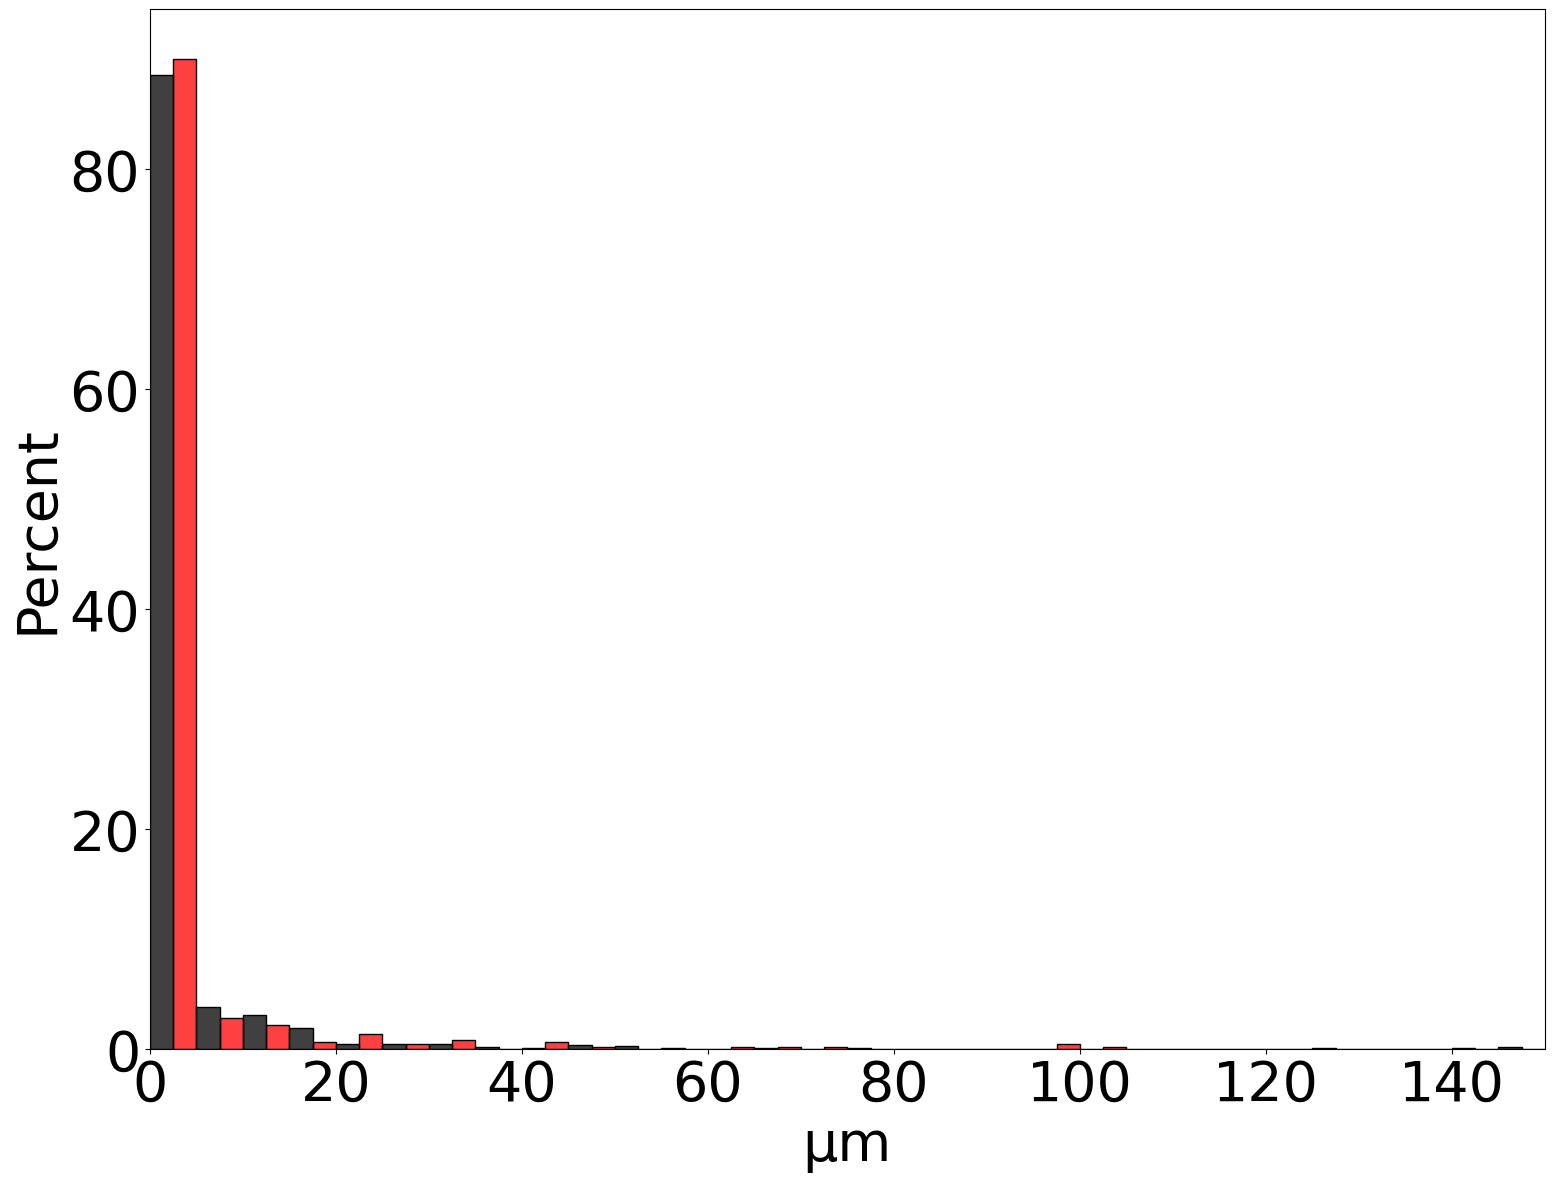

In [209]:
###extracting MK distance to vessel
####automating the merging of the MK spreadsheets
##VWF_102_MS230520_M4_24hdep_tilescan-Stitching-06MK_Statistics vessel called vessels, watch out, I manually changed the name of the distance spreadsheet
#VWF_102_MS230520_M3_24hdep_tilescan-Stitching-05_Statistics same 
#VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics same, could have just put one option with vessels 
file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/tilescans_MK'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('Shortest_Distance_to_Surfaces_Surfaces=vessel.csv'):
            data=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            if file.endswith('Shortest_Distance_to_Surfaces_Surfaces=vessel.csv'):
                data['File_ID']=file.replace('Shortest_Distance_to_Surfaces_Surfaces=vessel.csv','_')
                data['FileID']=data['File_ID'].str[0:19]
            file_list.append(data)
            # print(file)

data=pd.concat(file_list, axis =0, ignore_index=True)
# print(data['FileID'].unique())

metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
metadata=metadata[['FileID','Treatment']].drop_duplicates()
datab=pd.merge(data, metadata[:], on = 'FileID')
# print(datab)


datab=datab[datab['Treatment']!='Old_homeostasis']
datab=datab[datab['Treatment']!='plt_depletion']
for b,r in datab.iterrows():
    if datab.loc[b,'Shortest Distance to Surfaces']<0: ###imaris has negative distances if the two surfaces overlap
        datab.loc[b,'Shortest Distance to Surfaces']=0
# datab=datab[['File_ID','MK_count','mean_vol','Treatment']].drop_duplicates()

plt.rcParams["font.size"]=40
g=sns.histplot(datab, x="Shortest Distance to Surfaces", hue="Treatment", palette=['black','red'], hue_order=('homeostasis','24h_depletion'), legend=False, binwidth=5, multiple="dodge",stat='percent', common_norm=False)
g.set(xlim=(0, 150))
g.set(xlabel='µm')

list=datab['Treatment'].unique()
for i in list:
    dx=datab[datab['Treatment']==i]
    print(i, len(dx['FileID'].unique()),dx['FileID'].unique())

##getting numbers for the percentages
dx=datab[datab['Treatment']!='homeostasis']
print('homeostasis', len(dx[dx['Shortest Distance to Surfaces']<5]), len(dx[dx['Shortest Distance to Surfaces']>5]))

# grouped=datab.groupby(['File_ID'])
# dflist=[]
# for i, newdf in grouped:
#     newdf['mean_distance']=newdf['Shortest Distance to Surfaces'].mean()
#     dflist.append(newdf[['File_ID','FileID','mean_distance','Treatment']].drop_duplicates())
# datab=pd.concat(dflist)
# g=(sns.violinplot(x=("Treatment"), hue='Treatment', y="mean_distance", data=datab, showfliers = False, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'), legend=False), sns.stripplot(x=("Treatment"), hue='Treatment', y="mean_distance", data=datab, alpha=0.3, dodge=True, palette=['black','black'], hue_order=('homeostasis','24h_depletion')))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='distance to vessel (µm)')

                                              File_ID   norm_vol  \
0          VWF_043_MS211125_m3-tilescanpaddedstiched_  22.409348   
1   VWF_053_MS220208_M3_homeostasis_tilescanpadded...  22.409348   
2        VWF_060_MS220408_M2_tilescanpadded-stitched_  29.352355   
3               VWF_062_MS220421_M5_TILESCAN_2padded_  46.594060   
4        VWF_063_MS220428_m1_tilescanpadded-stitched_  33.223368   
5          VWF_091_MS230402_M1_Tilescan-Stitching-01_  65.966574   
6   VWF_102_MS230520_M1_homeostasis_tilescan-Stitc...  68.318555   
7   VWF_102_MS230520_M3_24hdep_tilescan-Stitching-05_  66.554835   
8   VWF_102_MS230520_M4_24hdep_tilescan-Stitching-06_  57.241802   
9          VWF_109_MS230619_M1_tilescan-Stitching-05_  54.045477   
10         VWF_109_MS230619_M2_tilescan-Stitching-05_  58.219374   
11         VWF_109_MS230619_M3_tilescan-Stitching-03_  24.434301   
12      VWF_109_MS230619_M4_tilescan_padded-stitched_  28.661119   
13         VWF_109_MS230619_M5_tilescan-Stitchin

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/899878062.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['File_ID']=(metadata['Original_Filename']).str.replace('.czi','_')
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/899878062.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/899878062.py:58: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/899878062.py:70: FutureWarnin

[Text(0, 0.5, 'normalized vessel volume (µm3)')]

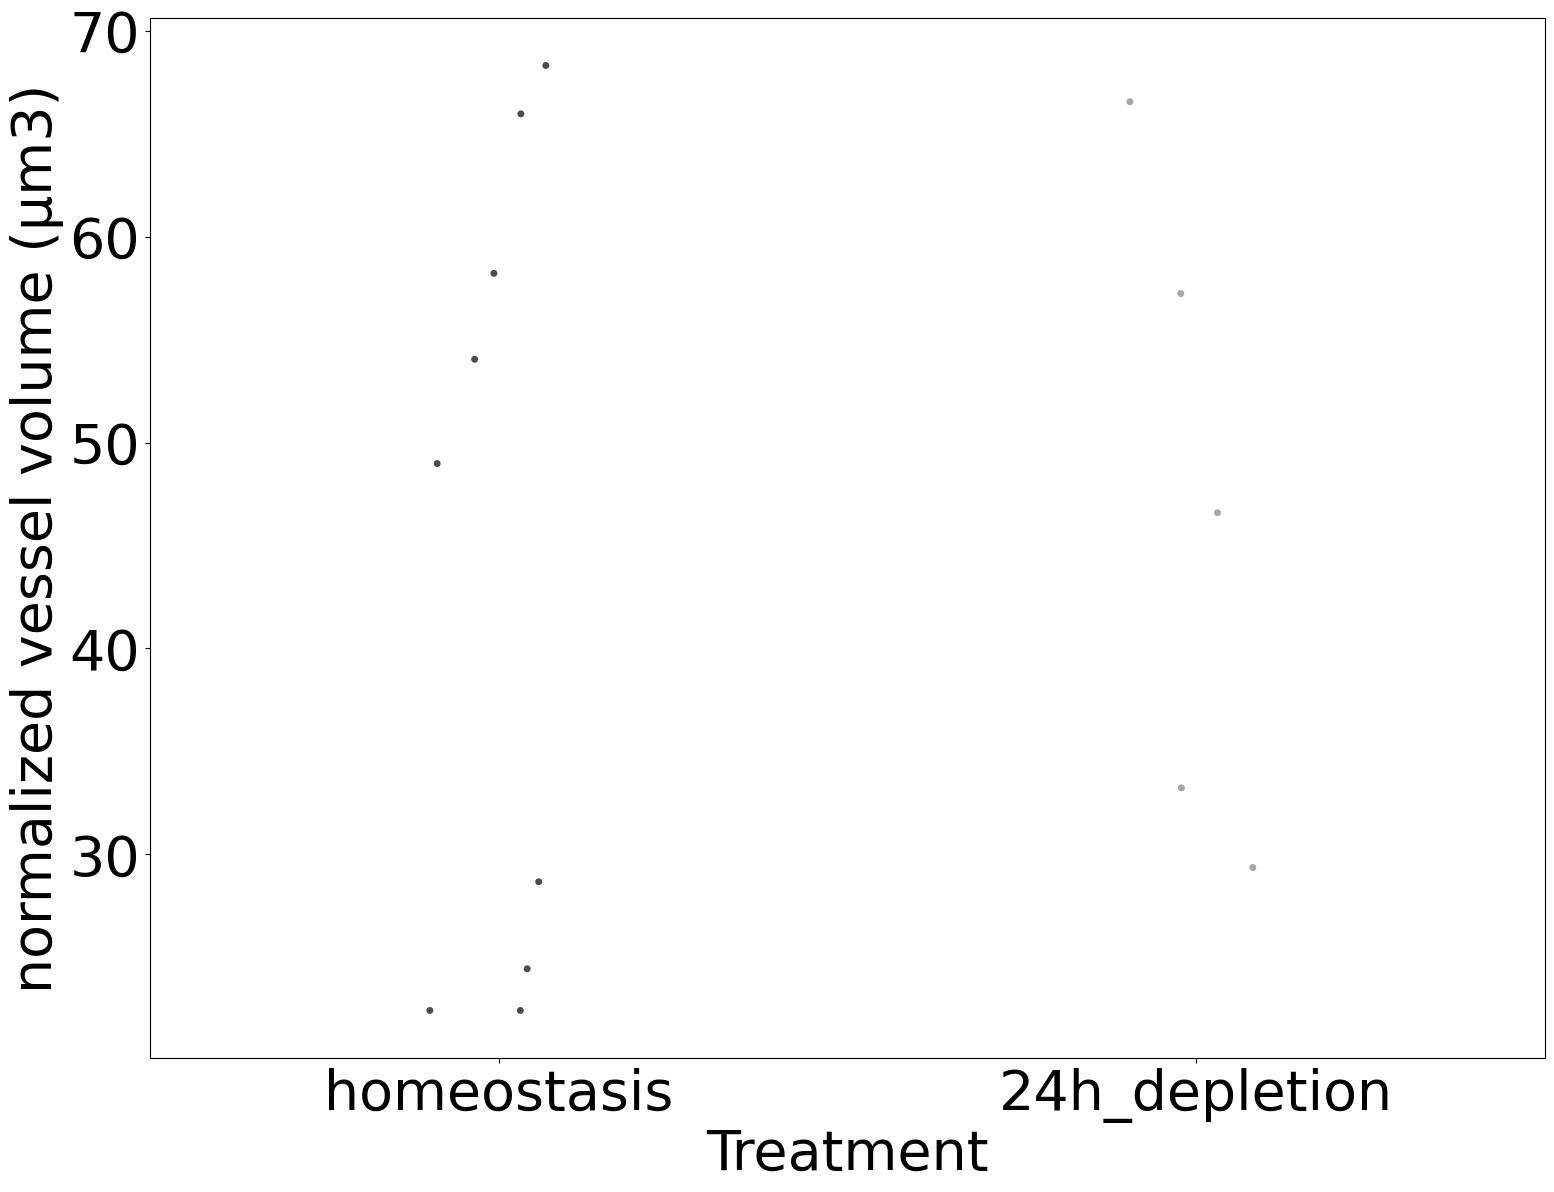

In [118]:
###vessel properties
###automated merging of Imaris tilescan

file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/vessel'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('Volume.csv'):
            data=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            data['File_ID']=file.replace('vessel_Volume.csv','_')
            file_list.append(data)

data=pd.concat(file_list, axis =0, ignore_index=True)
# print(data)
# print(data['File_ID'])

metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
metadata['File_ID']=(metadata['Original_Filename']).str.replace('.czi','_')
# print(metadata['File_ID'])
metadata=metadata[['File_ID','Treatment']].drop_duplicates()

datab=pd.merge(data, metadata[:], on = 'File_ID')
# print(datab)

# # data.to_csv('/Users/secchim/Documents/Experiments/distance analysis/vessel/vessel_volume.csv', index=False)

grouped=datab.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['sum_vol']=newdf['Volume'].sum()
    # newdf['total_vol']=newdf['Volume Outside'].max()
    # newdf['MK_norm']=newdf['MK_count']/newdf['total_vol']
    dflist.append(newdf)
datab=pd.concat(dflist)

datab=datab[['File_ID','sum_vol','Treatment']].drop_duplicates()
datab=datab[datab['Treatment']!='ageing']

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="sum_vol", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='vessel volume (µm3)')

file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/vessel'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('vessel_Volume_Outside_Img=1.csv'):
            dt=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            dt['File_ID']=file.replace('vessel_Volume_Outside_Img=1.csv','_')
            file_list.append(dt)
dt=pd.concat(file_list, axis =0, ignore_index=True)

# print(dt)
# print(dt['File_ID'])

###like above, I am using the vessels to estimate BM volume
grouped=dt.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf=newdf[newdf['Distance to Surface']>29] #tried with 24 and 25
    newdf=newdf[newdf['Distance to Surface']<31]
    # newdf['total_vol']=newdf['Volume Outside'].max()
    newdf['total_vol']=newdf['Volume Outside']
    dflist.append(newdf)
dt=pd.concat(dflist)
dt=dt[['File_ID','total_vol']].drop_duplicates()
datab=pd.merge(datab, dt[:], on = 'File_ID')

grouped=datab.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['norm_vol']=newdf['sum_vol']/(newdf['total_vol']+newdf['sum_vol'])*100
    dflist.append(newdf)
datab=pd.concat(dflist)
datab=datab[['File_ID','norm_vol','Treatment']].drop_duplicates()
print(datab)
# datab.to_csv('/Users/secchim/Documents/Experiments/distance analysis/vessel/vessel_volumeplot.csv', index=False)

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="norm_vol", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g.set(ylabel='normalized vessel volume (µm3)')

###issue with VWF_062

In [154]:
###DISTANCES BETWEEN MK BASED ON POSITION, center to center, because Imaris doesn't measure distances between objects of the same category
##code is the same as distances between KuO cells

data=pd.read_csv('/Users/secchim/Documents/Experiments/distance analysis/MK_measurements.csv', index_col=None, header=0)

datab=data[data['Treatment']!='ageing']
datab=datab[datab['Volume']>4188]
datab=datab[datab['Volume']<150000]
datab['Final_Cell_ID']=datab['File_ID']+datab['ID_1'].astype(str)
dict={}
dict=dict.fromkeys(datab['Final_Cell_ID'].unique())
# print(dict, type(dict))

grouped=datab.groupby(['File_ID'])
for i, newdf in grouped:
    if len(newdf['Final_Cell_ID'].unique())>1:
        for a in newdf['Final_Cell_ID'].unique():
            for b in newdf['Final_Cell_ID'].unique():
                if a!=b:
                    a_coordinates=newdf[newdf['Final_Cell_ID']==a]
                    b_coordinates=newdf[newdf['Final_Cell_ID']==b]
                    min_distance_to_MK=mt.sqrt((a_coordinates.iloc[0,2]-b_coordinates.iloc[0,2])**2+(a_coordinates.iloc[0,3]-b_coordinates.iloc[0,3])**2+(a_coordinates.iloc[0,4]-b_coordinates.iloc[0,4])**2)
                    # print(dict[a])
                    if dict[a]==None: 
                        dict[a]=min_distance_to_MK
                    elif dict[a]>min_distance_to_MK:
                        dict[a]=min_distance_to_MK

print(dict)
addup=pd.DataFrame.from_dict(dict, orient='index', columns=['min_distance_to_MK'])
addup['Final_Cell_ID']=addup.index

data=pd.merge(datab, addup[:], on = 'Final_Cell_ID')
print(data['min_distance_to_MK'])
data=data[[ 'Final_Cell_ID','Treatment', 'min_distance_to_MK']]
data=data.drop_duplicates()

# data.to_csv('/Users/secchim/Downloads/distrib_MK.csv', index=False)

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/2512556464.py:14: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


{'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics1.0': 31.97284963465112, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics2.0': 38.304574772342775, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics3.0': 29.328844240610845, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics13.0': 57.11374197380161, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics15.0': 66.79133089286368, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics18.0': 81.27751307735743, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics22.0': 77.6688410760068, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics29.0': 66.79133089286368, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics31.0': 56.16361502120384, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics34.0': 51.39242227449484, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics37.0': 51.39242227449484, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics44.0': 51.23223020091926, 'VWF_091_MS230402_M1_Tilescan-Stitching-01_Statistics

homeostasis 9 ['VWF_091_MS230402_M1' 'VWF_102_MS230520_M1' 'VWF_043_MS211125_m3'
 'VWF_109_MS230619_M1' 'VWF_078_MS230122_M5' 'VWF_078_MS230122_M6'
 'VWF_078_MS230119_M1' 'VWF_107_MS230615_M1' 'VWF_053_MS220208_M3']
24h_depletion 5 ['VWF_102_MS230520_M3' 'VWF_063_MS220428_m1' 'VWF_062_MS220421_M5'
 'VWF_102_MS230520_M4' 'VWF_060_MS220408_M2']


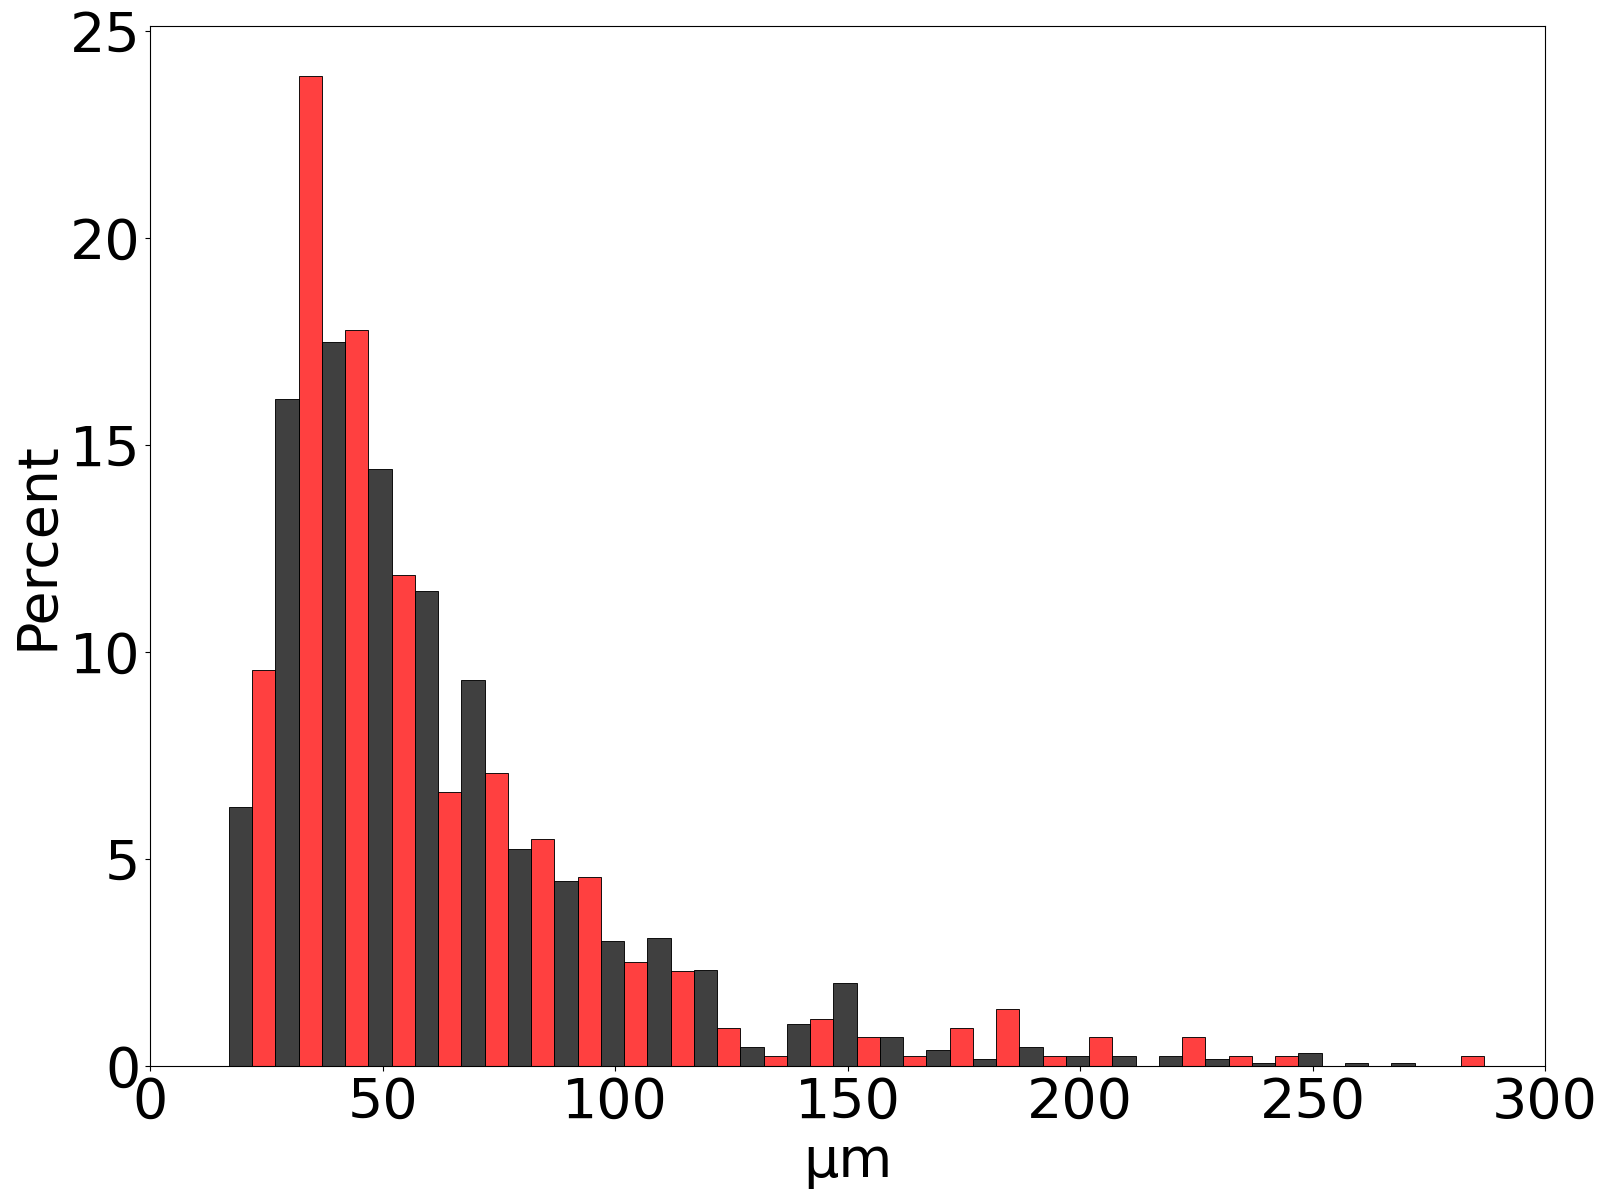

In [155]:
####plotting distribution of distances between MK with a histogram
plt.rcParams["font.size"]=40
g=sns.histplot(data, x="min_distance_to_MK", hue="Treatment", palette=['black','red'], hue_order=('homeostasis','24h_depletion'), legend=False, binwidth=10, multiple="dodge",stat='percent', common_norm=False)
# print(len(data['Final_Cell_ID'].unique()))
g.set(xlim=(0, 300))
g.set(xlabel='µm')

data['Batch_ID']=data['Final_Cell_ID'].str[0:19]
list=data['Treatment'].unique()
for i in list:
    dx=data[data['Treatment']==i]
    print(i, len(dx['Batch_ID'].unique()),dx['Batch_ID'].unique())

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/2640783913.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/2640783913.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


                                        Metadata_VWF     Add      X       OVP
0  VWF_078_MS230119_M1_tilescan_concatenated_Ch1_...  526468  11227  2.132513
1  VWF_078_MS230119_M2_Tilescan_Day0_1_Ch1_xyzCor...  244112  13608  5.574490
2  VWF_078_MS230122_M5_tilescan_concatenated_Ch1_...  754123  31057  4.118294
3  VWF_082_MS230327_M1_Tilescan_Day0_1_Ch1_xyzCor...  419574  30947  7.375815
4  VWF_082_MS230327_M3_Tilescan_Day0_1_Ch1_xyzCor...  301599  11072  3.671100


[(0.0, 20.0)]

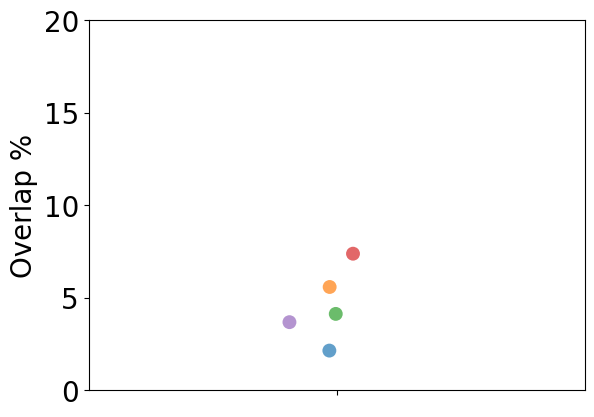

In [39]:
####MK OVERLAP 24H APART

###using CellProfiler MK segmentation 
###ADD is the sum of the MK signal in the two images
dataAdd=pd.read_csv('/Users/secchim/MK_ConvertImageToObjectsAdd.csv', index_col=None, header=0)
grouped=dataAdd.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['Add']=sum(newdf['AreaShape_Volume'])
    dflist.append(newdf)

dataAdd=pd.concat(dflist)
dataAdd=dataAdd[['Metadata_VWF','Add']].drop_duplicates()

###X is the MK signal that is present in both images (the binary threshold images have been multiplied)
dataX=pd.read_csv('/Users/secchim/MK_ConvertImageToObjectsX.csv', index_col=None, header=0)
grouped=dataX.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['X']=sum(newdf['AreaShape_Volume'])
    dflist.append(newdf)
dataX=pd.concat(dflist)
dataX=dataX[['Metadata_VWF','X']].drop_duplicates()


data=pd.merge(dataAdd, dataX[:], on = 'Metadata_VWF')
for i,b in data.iterrows():
    data.loc[i,'OVP']=data.loc[i,'X']/data.loc[i,'Add']*100
print(data)
g=sns.stripplot(hue=("Metadata_VWF"), y="OVP", data=data, alpha=0.7, s=10)
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g.set(ylabel='Overlap %')
g.set(ylim=(0, 20))

In [204]:
##GFP signal 24h apart
###from CellProfiler, Objects 1 are day1 MK, Objects 0 are day0 MK
data1=pd.read_csv('/Users/secchim/MK_2ConvertImageToObjects1.csv', index_col=None, header=0)
grouped=data1.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['Vol']=sum(newdf['AreaShape_Volume'])
    newdf['Day']=1
    dflist.append(newdf)

data1=pd.concat(dflist)
data1=data1[['Metadata_VWF','Vol','Day']].drop_duplicates()

data0=pd.read_csv('/Users/secchim/MK_2ConvertImageToObjects0.csv', index_col=None, header=0)
grouped=data0.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['Vol']=sum(newdf['AreaShape_Volume'])
    newdf['Day']=0
    dflist.append(newdf)
data0=pd.concat(dflist)
data0=data0[['Metadata_VWF','Vol','Day']].drop_duplicates()

data=pd.concat([data0, data1], axis=0, ignore_index=True)
data.to_clipboard() ##plotted in prism


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/2316553304.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_2766/2316553304.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
